In [7]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import torch
from torch import nn as nn
import torchvision
from glob import glob
from PIL import Image
from tqdm import tqdm

In [8]:
num_classes = 6

In [5]:
filenames = glob("../data/grass/mask/*.png")
len(filenames)

1151

In [6]:
metrics = {i: 0 for i in range(6)}
metrics

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0}

In [10]:
for filename in tqdm(filenames):
    mask = np.array(Image.open(filename))
    for i in range(num_classes):
        metrics[i] += (mask == i).sum()

100%|██████████| 1151/1151 [00:09<00:00, 115.43it/s]


In [13]:
metrics

{0: 87943, 1: 30612281, 2: 5329576, 3: 4040259, 4: 3513100, 5: 31848777}

In [25]:
total = sum(list(metrics.values()))
metrics_ration = {key:round((value / total) * 100,2) for key,value in metrics.items()}
metrics_ration

{0: 0.12, 1: 40.58, 2: 7.07, 3: 5.36, 4: 4.66, 5: 42.22}

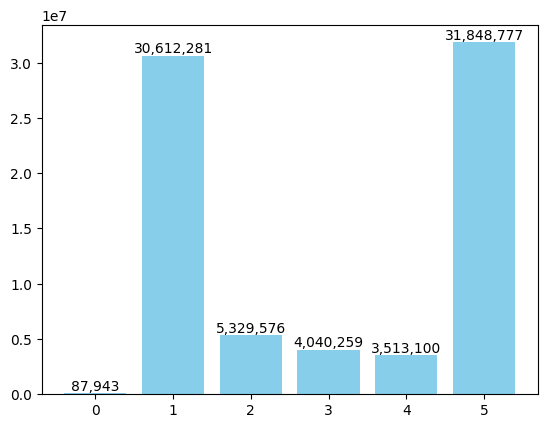

In [44]:
# plt.figure(figsize=(12,8))
bars = plt.bar(list(metrics.keys()),list(metrics.values()),color='skyblue')
index = 0
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,}', ha='center', va='bottom')
    # plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:,}  {metrics_ration[index]}%', ha='center', va='bottom')
    # plt.text(bar.get_x() + bar.get_width() / 2, height + 50000, f'{metrics_ration[index]:} %', ha='center', va='bottom')
    index += 1


In [31]:
colors = sns.color_palette(None,6)
type(colors)

seaborn.palettes._ColorPalette

In [32]:
colors_np = np.array([[255, 255, 255], [168, 213, 186], [108, 197, 81], [76, 175, 80],
                 [56, 142, 60], [27, 94, 32]]).astype(np.float32)
colors_np

array([[255., 255., 255.],
       [168., 213., 186.],
       [108., 197.,  81.],
       [ 76., 175.,  80.],
       [ 56., 142.,  60.],
       [ 27.,  94.,  32.]], dtype=float32)

In [33]:
colors_np = colors_np / 255.
colors_np

array([[1.        , 1.        , 1.        ],
       [0.65882355, 0.8352941 , 0.7294118 ],
       [0.42352942, 0.77254903, 0.31764707],
       [0.29803923, 0.6862745 , 0.3137255 ],
       [0.21960784, 0.5568628 , 0.23529412],
       [0.10588235, 0.36862746, 0.1254902 ]], dtype=float32)

In [34]:
colors.clear()

In [35]:
colors

[]

In [36]:
for i in range(num_classes):
    colors.append(colors_np[i])
colors

[array([1., 1., 1.], dtype=float32),
 array([0.65882355, 0.8352941 , 0.7294118 ], dtype=float32),
 array([0.42352942, 0.77254903, 0.31764707], dtype=float32),
 array([0.29803923, 0.6862745 , 0.3137255 ], dtype=float32),
 array([0.21960784, 0.5568628 , 0.23529412], dtype=float32),
 array([0.10588235, 0.36862746, 0.1254902 ], dtype=float32)]